## Nearest neighbors
    one of the simplest predictive models there is. It makes no mathematical assumptions, and it doesn’t require any sort of heavy machinery. The only things it requires are:
    - Some notion of distance
    - An assumption that points that are close to one another are similar

#### Counting Votes 

In [1]:
from typing import List
from collections import Counter


def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner


print(raw_majority_vote(['a', 'b', 'c', 'b', 'c','c']))

c


### Reducing k to find unique result

In [4]:
from typing import List
from collections import Counter

def majority_vote(labels : List[str]) -> str:
    votes_count = Counter(labels)
    winner, winner_count = votes_count.most_common(1)[0]
    num_winners = len([count for count in votes_count.values() if count == winner_count])

    if num_winners == 1:
        return  winner       #unique winner, len = 1
    else:
        return majority_vote(labels[:-1])

# look that there is a tie here, but if we consider only first 4, it's b'
print(majority_vote(['a','b','c','b','a']))

b


In [2]:
from typing import NamedTuple, List
from scratch.linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)


### Example Data Set

In [12]:
import requests

data = requests.get('https://archive.ics.uci.edu/ml/datasets/iris/iris.data')
with open('iris.data', 'w') as f:
    f.write(data.text)

data

<Response [200]>

### Our model will predict the species of flower from given 4 attributes

In [14]:
import random

def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]


For every dimension from 1 to 100, we’ll compute 10,000 distances and use those to compute the average distance between points and the minimum distance between points in each dimension

In [16]:
import tqdm
dimensions = range(1, 101)
    
avg_distances = []
min_distances = []
    
random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    
    distances = random_distances(dim, 10000)      # 10,000 random pairs
    avg_distances.append(sum(distances) / 10000)  # track the average
    min_distances.append(min(distances))          # track the minimum
    
min_avg_ratio = [min_dist / avg_dist
                     for min_dist, avg_dist in zip(min_distances, avg_distances)]


Curse of Dimensionality: 100%|████████████████| 100/100 [00:17<00:00,  5.86it/s]


    As the number of dimensions increases, the average distance between points increases.

Ratio between the closeset distance and average distance

In [17]:
min_avg_ratio = [min_dist/avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]
min_avg_ratio

[2.4010264196729895e-05,
 0.012375993376885747,
 0.05866675835687187,
 0.052702840066952916,
 0.13806017036605744,
 0.16706667538692488,
 0.13946376694501153,
 0.21627918375769406,
 0.2584599213183403,
 0.269306360063673,
 0.27670626780046326,
 0.3706318741676572,
 0.26499940923263887,
 0.3552552587706282,
 0.3474871534632107,
 0.42834610882474056,
 0.42466657369159216,
 0.4446491710023277,
 0.535207240511332,
 0.34176993540037365,
 0.5388246061126235,
 0.5058621513898754,
 0.5347436432023157,
 0.5444461514254334,
 0.47597755191184377,
 0.4905464153431202,
 0.5867979218606769,
 0.5123632294260677,
 0.5424819954205379,
 0.5742090130686824,
 0.5897087379993046,
 0.5775736849502905,
 0.5673715611211803,
 0.5449292858365001,
 0.5796885476098184,
 0.6480053723471617,
 0.6602812580026879,
 0.6289471963191565,
 0.6418344464162202,
 0.6158132408201428,
 0.6091619742363008,
 0.664640030446849,
 0.6564359615197871,
 0.6539490799106948,
 0.6429102073843518,
 0.64757033619389,
 0.6497423009935857,

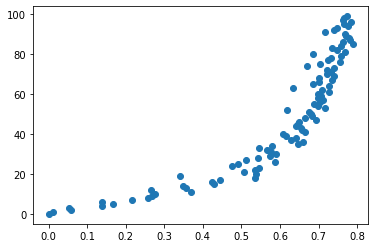

In [25]:
import matplotlib.pyplot as plt
import numpy as np

dim = np.arange(len(min_avg_ratio))
plt.scatter(min_avg_ratio,dim)
plt.show()